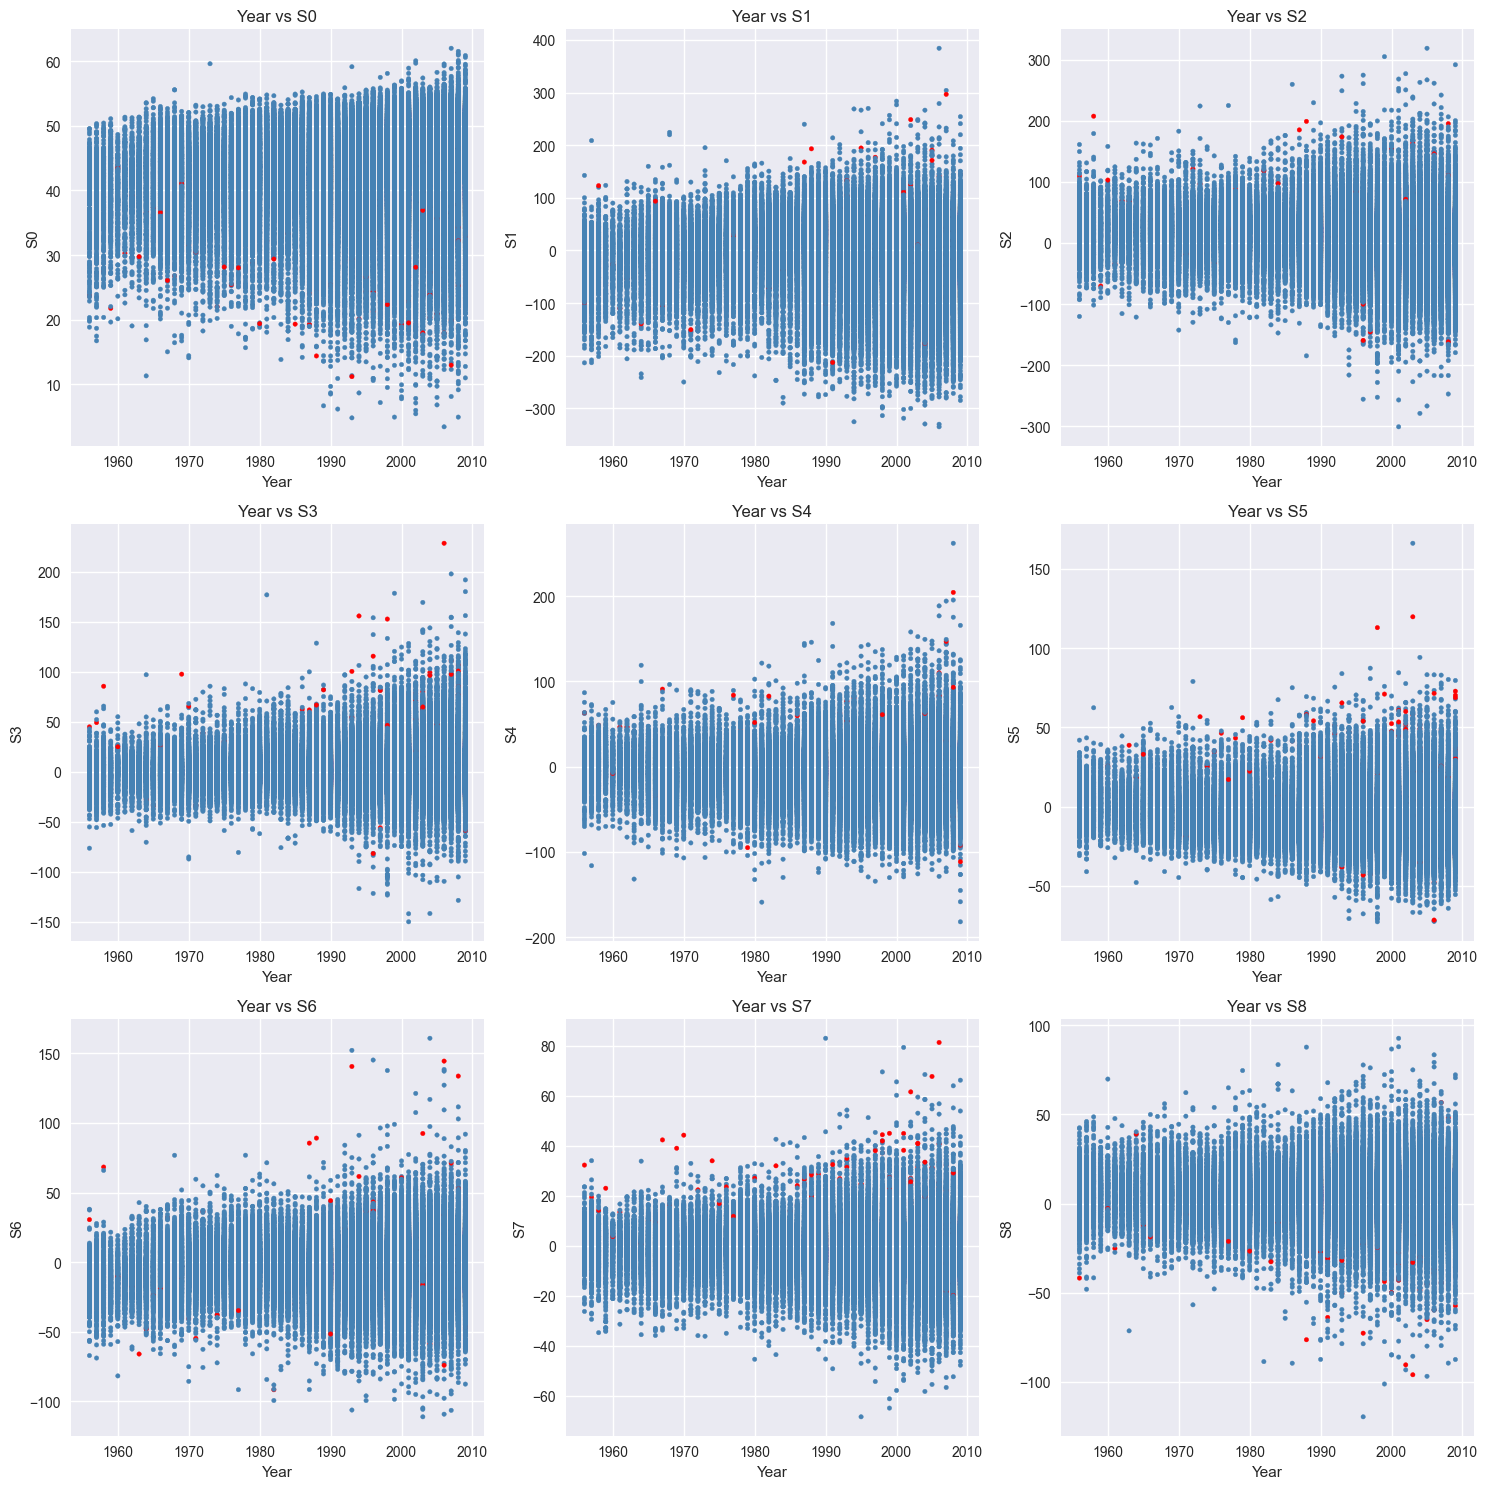

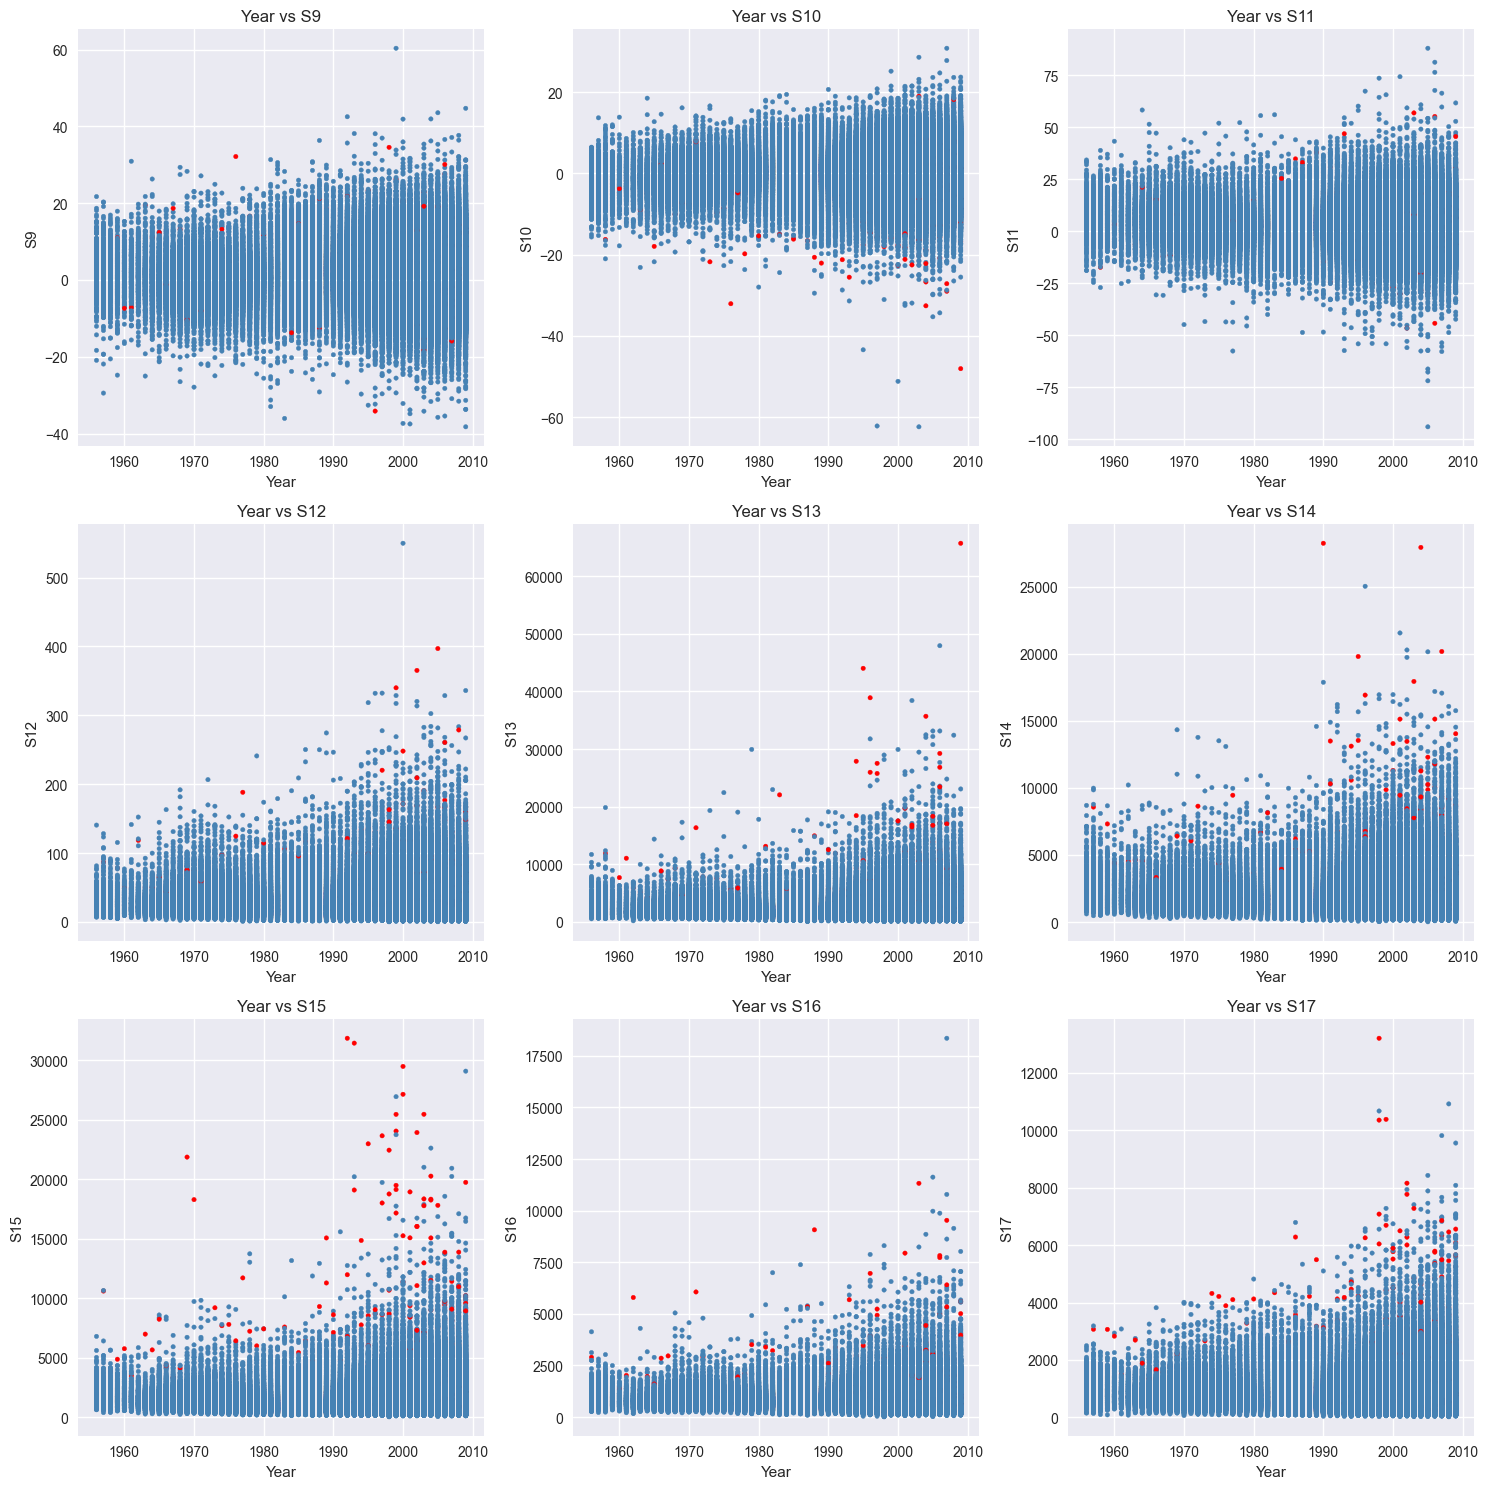

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

plt.style.use("seaborn-v0_8")

random_state = 42


df = pd.read_csv("train.csv")

columns = [col for col in df.columns if col != "Year"]

outliers = pd.Series(index=df.index, dtype=bool)

# Calcola gli outlier per ogni anno e ogni colonna
for year in df["Year"].unique():
    subset = df[df["Year"] == year]
    clf = IsolationForest(
        n_estimators=500,
        # max_samples=1.0,
        # max_features=len(columns),
        contamination=0.0005,
        n_jobs=-1,
        random_state=random_state,
    )
    outliers[subset.index] = clf.fit_predict(subset[columns]) == -1


max_subplots = 9

for i in range(0, len(columns), max_subplots):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for j, col in enumerate(columns[i : i + max_subplots]):
        # Colora gli outlier di rosso e gli altri punti del colore di default
        colors = np.where(outliers, "red", "steelblue")
        axs[j].scatter(df["Year"], df[col], c=colors, s=10)
        axs[j].set_xlabel("Year")
        axs[j].set_ylabel(col)
        axs[j].set_title(f"Year vs {col}")

    for k in range(j + 1, max_subplots):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()